In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
    

In [11]:
df=pd.read_csv("C:\\Users\\HP\\Downloads\\canada_per_capita_income.csv")
df.head()


,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


C:\Users\HP\AppData\Local\Temp\ipykernel_8056\51059607.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['per capita income (US$)'])


[]

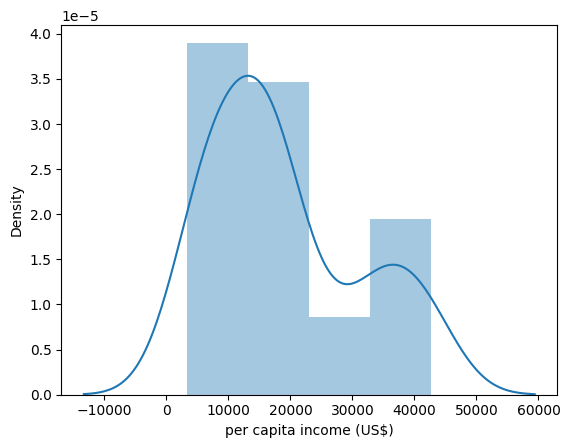

In [101]:
sns.distplot(df['per capita income (US$)'])
plt.plot()


Text(0.5, 1.0, 'year VS income')

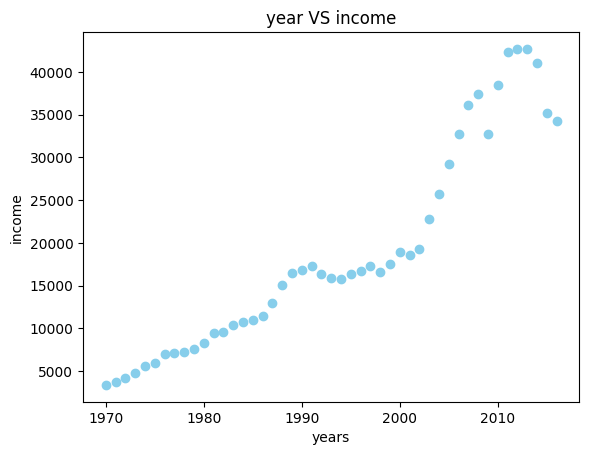

In [32]:
plt.scatter(df['year'],df["per capita income (US$)"],color='skyblue')
plt.xlabel('years')
plt.ylabel('income')
plt.title("year VS income")

In [34]:
X=df.iloc[:,:1]
y=df.iloc[:,1:]


In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=48)


In [87]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [88]:
y_pred_test=reg.predict(X_test)
y_pred_train=reg.predict(X_train)


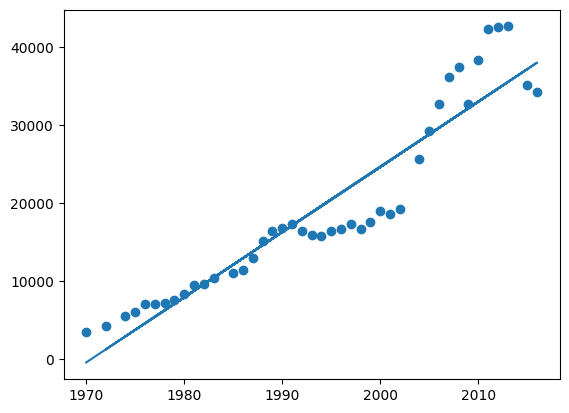

In [89]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred_train)
plt.show()

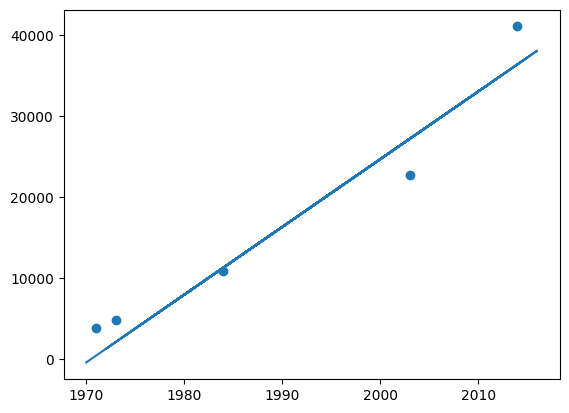

In [90]:
plt.scatter(X_test,y_test)
plt.plot(X_train,y_pred_train)
plt.show()

In [91]:
print(reg.coef_)
print(reg.intercept_)

[[836.67712276]]
[-1648702.97018595]


In [92]:
# Calculate MSE for training and testing datasets
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Mean Squared Error on Training Data:", mse_train)
print("Mean Squared Error on Testing Data:", mse_test)


Mean Squared Error on Training Data: 15892456.739120072
Mean Squared Error on Testing Data: 12118043.004599027


In [93]:
# R² Score for training and testing
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("R² Score on Training Data:", r2_train)
print("R² Score on Testing Data:", r2_test)


R² Score on Training Data: 0.8820788710104746
R² Score on Testing Data: 0.937698771682558


In [161]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
poly_model = make_pipeline(poly, LinearRegression())

# Fit on training data
poly_model.fit(X_train, y_train)

# Predictions
y_pred_poly_train = poly_model.predict(X_train)
y_pred_poly_test = poly_model.predict(X_test)

# Evaluate Polynomial Model
print("R² Score (Training):", r2_score(y_train, y_pred_poly_train))
print("R² Score (Testing):", r2_score(y_test, y_pred_poly_test))


R² Score (Training): 0.9190743660070638
R² Score (Testing): 0.9846230502201323


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


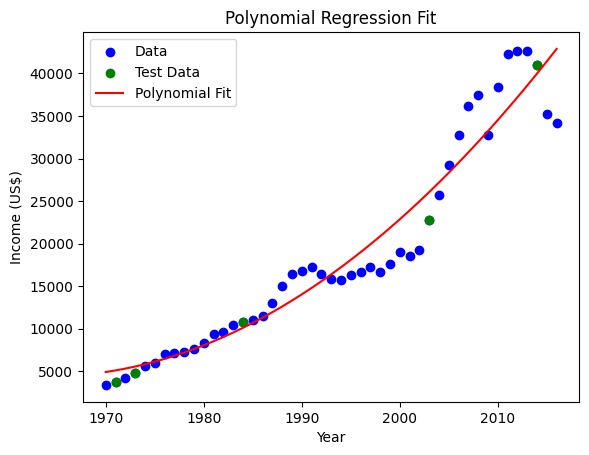

In [162]:
# Generate predictions for visualization
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_poly_pred = poly_model.predict(X_range)

# Plot the polynomial regression line
plt.scatter(X, y, color='blue', label='Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_range, y_poly_pred, color='red',label='Polynomial Fit')
plt.xlabel('Year')
plt.ylabel('Income (US$)')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()


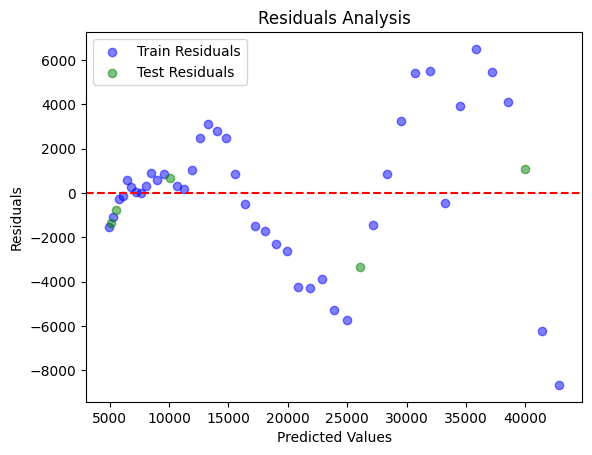

In [163]:
# Residuals
residuals_train = y_train - y_pred_poly_train
residuals_test = y_test - y_pred_poly_test

plt.scatter(y_pred_poly_train, residuals_train, color='blue', alpha=0.5, label='Train Residuals')
plt.scatter(y_pred_poly_test, residuals_test, color='green', alpha=0.5, label='Test Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Analysis')
plt.legend()
plt.show()


In [164]:
scores = cross_val_score(poly_model, X, y, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", scores)
print("Mean CV R²:", scores.mean())


Cross-Validation R² Scores: [ -4.2459274    0.26596603 -23.75571751   0.51149256  -1.71698675]
Mean CV R²: -5.78823461385046


In [165]:

ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate R² score
print("R² Score on Test Data (Ridge):", r2_score(y_test, y_pred_ridge))


R² Score on Test Data (Ridge): 0.9377165577609659


In [166]:
# Ridge regression with cross-validation to select the best alpha
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), store_cv_values=True)
ridge_cv.fit(X_train, y_train)
print("Best alpha:", ridge_cv.alpha_)
print("R² score on test data:", r2_score(y_test, ridge_cv.predict(X_test)))


Best alpha: 10.0
R² score on test data: 0.937874470589639


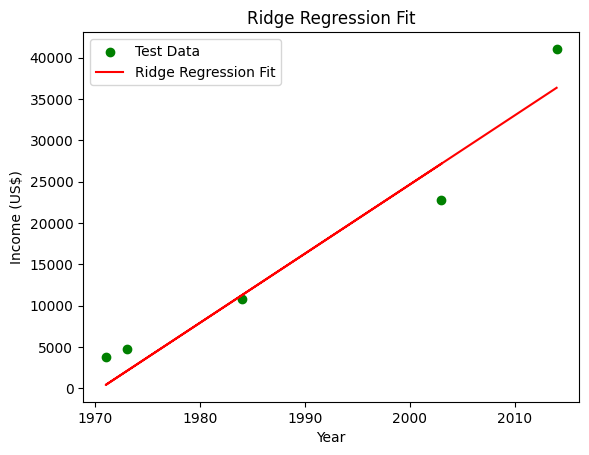

In [130]:
# Plot Ridge Regression results
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, ridge_cv.predict(X_test), color='red', label='Ridge Regression Fit')
plt.xlabel('Year')
plt.ylabel('Income (US$)')
plt.title('Ridge Regression Fit')
plt.legend()
plt.show()
